In [1]:
#Dependencies
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot, pylab
import scipy.stats as stats
import math


In [44]:
#Read in the data
df = pd.read_csv("../../raw data/Austin_merged_data_with_time_deltas.csv")

In [45]:
#create lists for boxplot showing intake times for cats vs dogs

purebred=[]
mixed_breed=[]

#fill the lists
for row in range(len(df)):    
    if (df.loc[row,'Days from Intake to Outcome']>0) & (df.loc[row,'Purebred_intake']==1):
        purebred.append(df.loc[row,'Days from Intake to Outcome'])
    elif (df.loc[row,'Days from Intake to Outcome']>0) & (df.loc[row,'Purebred_intake']==0):
        mixed_breed.append(df.loc[row,'Days from Intake to Outcome'])                               
    else:
        continue

In [46]:
%%capture

#set up the figure
data=[purebred,mixed_breed]
labels=['Purebred','Mixed Breed']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by Purebred Status')
pylab.xlabel("Purebred Status")
pylab.ylabel("Days from Intake to Outcome")

0    54774
1     2819
Name: Purebred_intake, dtype: int64

Mean values:
Purebreed: 14.794
Mixed Breed: 17.933

Standard Deviations:
Purebreed: 34.501
Mixed Breed: 38.36

Medians:
Purebreed: 4.917
Mixed Breed: 5.447


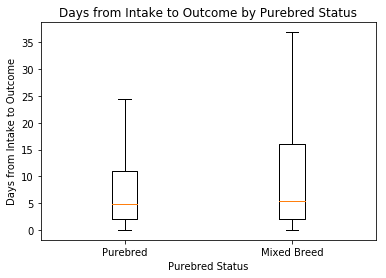

In [47]:
#save box and whiskers plot to PNG file
pyplot.savefig('../figures/time_to_outcome_by_purebred_status.png')

df['Purebred_intake'].value_counts()
print(f"Mean values:\nPurebreed: {round(np.mean(purebred),3)}\nMixed Breed: {round(np.mean(mixed_breed),3)}\n")
print(f"Standard Deviations:\nPurebreed: {round(np.std(purebred),3)}\nMixed Breed: {round(np.std(mixed_breed),3)}\n")
print(f"Medians:\nPurebreed: {round(np.median(purebred),3)}\nMixed Breed: {round(np.median(mixed_breed),3)}")

#show box and whiskers plot
pyplot.show()


In [48]:
#check for equality of variances (Levene's test)
stats.levene(purebred,mixed_breed)

#p = 0.41, do not reject the null hypothesis that variances are equal. (Assume equal variances)

# Run 2-Sample T-Test
result=stats.ttest_ind(purebred,mixed_breed, equal_var=False)

LeveneResult(statistic=16.135470861745432, pvalue=5.9047982536639335e-05)

In [49]:
print(f"t = {round(result.statistic,3)}\nP = {round(result.pvalue,3)}\nThe difference is significant.")

t = -4.557
P = 0.0
The difference is significant.
